In [1]:
import warnings

warnings.filterwarnings('ignore')

In [19]:
# import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df_mv = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Model_Validation.csv')

df_mv.head()

,Inputs,Outputs
0,-0.752759,-0.352622
1,2.704286,0.192409
2,1.391964,0.558147
3,0.591951,0.950694
4,-2.063888,-1.212273


In [5]:
df_mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Inputs   1000 non-null   float64
 1   Outputs  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [6]:
df_mv.columns

Index(['Inputs', 'Outputs'], dtype='object')

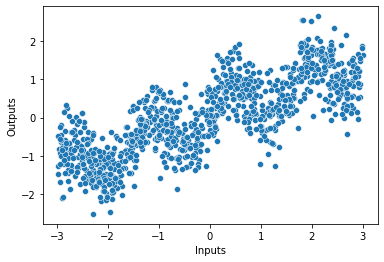

In [7]:
# distribution visualization

sns.scatterplot(df_mv.Inputs, df_mv.Outputs)
plt.show()

## 1. 7:3 Array Split
- random_state = 2045

In [11]:
# train, test split (7:3)

X_train, X_test, y_train, y_test = train_test_split(df_mv[['Inputs']] ,
                                                    df_mv['Outputs'] ,
                                                    test_size = 0.3 ,
                                                    random_state = 2045)

In [12]:
# check shapes of training & testing data

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 1), (700,), (300, 1), (300,))

In [30]:
X_train.head()

,Inputs
818,-2.671430
615,2.525234
872,0.863997
394,-0.955179
435,1.205815


## 2. 5차, 7차, 9차 모델
- Test Error 비교

In [13]:
# fitting models

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# y_hat

y_hat_1 = Model_1.predict(X_test)

In [15]:
y_hat_1.shape

(300,)

In [18]:
# check MSE 

err_1 = mean_squared_error(y_test, y_hat_1)

err_1

0.3933744691015871

In [20]:
# creating 5-degree model with preprocessing

poly = PolynomialFeatures(degree = 5, include_bias = False)
px_5_train = poly.fit_transform(X_train)

In [21]:
Model_5 = LinearRegression()
Model_5.fit(px_5_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# y_hat with testing data

px_5_test = poly.fit_transform(X_test)

y_hat_5 = Model_5.predict(px_5_test)

In [24]:
y_hat_5.shape

(300,)

In [25]:
# check MSE

err_5 = mean_squared_error(y_test, y_hat_5)

err_5

0.3602980472002336

In [26]:
# 9-degree model

poly = PolynomialFeatures(degree = 9 , include_bias = False)
px_9_train = poly.fit_transform(X_train)
px_9_test = poly.fit_transform(X_test)

# model-fitting
Model_9 = LinearRegression()
Model_9.fit(px_9_train, y_train)


# y_hat
y_hat_9 = Model_9.predict(px_9_test)

In [27]:
# check MSE
err_9 = mean_squared_error(y_test, y_hat_9)

err_9

0.2893114750133329

In [28]:
# compare errors of 3 models

print('MSE of 1-degree model: ' , err_1)
print('MSE of 5-degree model: ' , err_5)
print('MSE of 9-degree model: ' , err_9)

MSE of 1-degree model:  0.3933744691015871
MSE of 5-degree model:  0.3602980472002336
MSE of 9-degree model:  0.2893114750133329


## 3. Split 및 Modeling 시각화

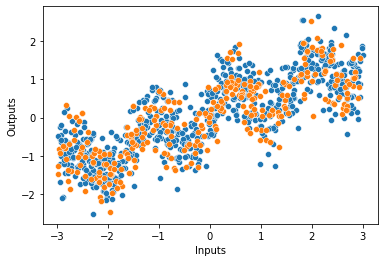

In [33]:
# 7:3 split - distribution visualization

sns.scatterplot(X_train.Inputs, y_train)
sns.scatterplot(X_test.Inputs, y_test)
plt.show()

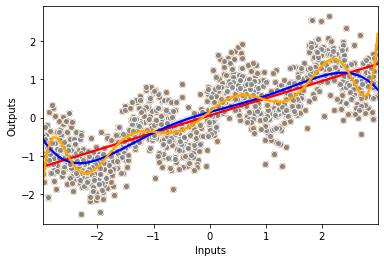

In [37]:
# modeling visualization

sns.regplot(x = 'Inputs' , y = 'Outputs' , data = df_mv , line_kws = {'color' : 'red'})
sns.regplot(x = 'Inputs' , y = 'Outputs' , data = df_mv , line_kws = {'color' : 'blue'} , order = 5)
sns.regplot(x = 'Inputs' , y = 'Outputs' , data = df_mv , line_kws = {'color' : 'orange'} , order = 9 ,
            scatter_kws = {'color' : 'gray' , 'edgecolor' : 'white'})


plt.show()
          